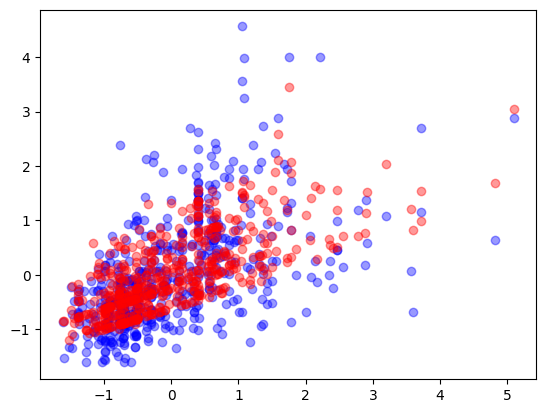

In [ ]:
# elastic net from scratch
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

csv=pd.read_csv('Housing.csv')
x_pn = np.array(
    csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv['price'])

# normalizing
x = (x_pn-np.mean(x_pn, axis=0))/np.std(x_pn, axis=0)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

def Elastic_NET_GD(x,y,lam_1,lam_2,learning_rate,n_iter):
    # lam_1: lasso penalty
    # lam_2: ridge penalty
    n=len(y)
    y=y.reshape(-1,1)
    X=np.c_[np.ones((n,1)),x]
    beta=np.zeros((X.shape[1],1))

    for _ in range(n_iter):
        y_pred=X @ beta
        # cost function
        cf=y_pred - y
        # gradient
        dm = (1/n)*(X.T @ cf)+(lam_2/n)*beta
        z=beta-(learning_rate*dm)
        beta = np.sign(z)*np.maximum(np.abs(z)-(learning_rate*lam_1), 0)

    #  model prediction
    y_prediction=X @ beta
    
    # model evaluation
    mse=mean_squared_error(y,y_prediction)
    r2=r2_score(y,y_prediction)
    # print(mse)
    # print(r2)

    # plotting
    plt.scatter(x[:,0],y,alpha=0.4,color='blue',label='Actual DP')
    plt.scatter(x[:,0],y_prediction,alpha=0.4,color='red',label='Predicted DP')
    plt.legend()
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Elastic NET (GD)')
    plt.show()

    

Elastic_NET_GD(x,y,0.01,0.01,0.1,10000)



